<a href="https://colab.research.google.com/github/Mauro365/Coderhouse---Data-Science-I/blob/main/ProyectoDSParteI%2BSalinas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

El dataset contiene los datos asociados a distintos alojamientos de AirBNB. El objetivo es predecir si el rating del alojamiento podrá alcanzar las 4 estrellas.

Las hipótesis serán:
-La ubicación del alojamiento tiene impacto sobre el rating\
-La política de mínimo de noches a contratar influye a la hora de que el cliente establezca una reseña.
-El método de asignación de IDs únicas está relacionado de alguna manera a el rating.

Las variables que se les dará mayor importancia con este fin son:
  -review_rate_number: representa el rating promedio que se le ha dado al alojamiento. Es la variable que se busca predecir.
  -minimum_nights: indica el mínimo de noches que por política de
  -neighbourhood: representa la ciudad del alojamiento.
  -id: número único de identificación del alojamiento.

Otras variables:
  -name: nombre del alojamiento.
  -host_id: id de identificación del host.
  -host_identity_verified: verifica si existe o no identidad del host.
  -host_name: indica primer nombre del host.
  -neighbourhood_group: agrupación de neighbourhood.
  -lat: coordenada de latitud del alojamiento.
  -long: coordenada de longitud del alojamiento.
  -instant_bookable: política de booking, puede ser instantánea (true) o con aceptación del alojamiento (false).
  -cancellation_policy: política de cancelación.
  -room_type: tipo de apartamento.
  -construction_year: año de construcción del alojamiento.
  -price: precio por noche del alojamiento.
  -service_fee: tasa por servicio.
  -number_of_reviews: cantidad de reviews.
  -last_review: fecha de la última review.
  -reviews_per_month: reviews por mes promedio.
  -availability_365: disponibilidad de habitaciones a lo largo del año (sumatoria de disponibilidad de habitaciones en cada día a lo largo de últimos 365 días).
  -house_rules: breve texto que declara reglas del alojamiento.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('/airbnb_nyc_clean.csv')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69305 entries, 0 to 69304
Data columns (total 23 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              69305 non-null  int64  
 1   name                            69305 non-null  object 
 2   host_id                         69305 non-null  int64  
 3   host_identity_verified          69305 non-null  object 
 4   host_name                       69305 non-null  object 
 5   neighbourhood_group             69305 non-null  object 
 6   neighbourhood                   69305 non-null  object 
 7   lat                             69305 non-null  float64
 8   long                            69305 non-null  float64
 9   instant_bookable                69305 non-null  bool   
 10  cancellation_policy             69305 non-null  object 
 11  room_type                       69305 non-null  object 
 12  construction_year               

In [5]:
df.shape

(69305, 23)

In [6]:
df.isna().sum()/df.shape[0]*100

,0
id,0.0
name,0.0
host_id,0.0
host_identity_verified,0.0
host_name,0.0
neighbourhood_group,0.0
neighbourhood,0.0
lat,0.0
long,0.0
instant_bookable,0.0


In [7]:
df.dropna(subset=['service_fee'])

,id,name,host_id,host_identity_verified,host_name,neighbourhood_group,neighbourhood,lat,long,instant_bookable,...,price,service_fee,minimum_nights,number_of_reviews,last_review,reviews_per_month,review_rate_number,calculated_host_listings_count,availability_365,house_rules
0,1001254,Clean & quiet apt home by the park,80014485718,unconfirmed,Madaline,Brooklyn,Kensington,40.64749,-73.97237,False,...,966.00000,193.000000,10.0,9.0,2021-10-19,0.21,4.0,6.0,286.0,Clean up and treat the home the way you'd like...
1,1002102,Skylit Midtown Castle,52335172823,verified,Jenna,Manhattan,Midtown,40.75362,-73.98377,False,...,142.00000,28.000000,13.0,45.0,2022-05-21,0.38,4.0,2.0,228.0,Pet friendly but please confirm with me if the...
2,1002403,THE VILLAGE OF HARLEM....NEW YORK !,78829239556,unconfirmed,Elise,Manhattan,Harlem,40.80902,-73.94190,True,...,620.00000,124.000000,3.0,0.0,2019-06-14,0.79,5.0,1.0,352.0,"I encourage you to use my kitchen, cooking and..."
3,1002755,blank,85098326012,unconfirmed,Garry,Brooklyn,Clinton Hill,40.68514,-73.95976,True,...,368.00000,74.000000,13.0,270.0,2019-07-05,4.64,4.0,1.0,322.0,blank
4,1003689,Entire Apt: Spacious Studio/Loft by central park,92037596077,verified,Lyndon,Manhattan,East Harlem,40.79851,-73.94399,False,...,204.00000,41.000000,10.0,9.0,2018-11-19,0.10,3.0,1.0,289.0,"Please no smoking in the house, porch or on th..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69300,57361342,Sunny budget friendly room in Bushwick,29964876857,verified,blank,Brooklyn,Bushwick,40.69370,-73.91006,True,...,624.73607,124.894026,5.0,3.0,2018-04-09,0.11,1.0,1.0,0.0,Please be mindful that I live in the same buil...
69301,57361894,"Cozy Apartment on Bedford Ave, Brooklyn",92852058426,unconfirmed,blank,Brooklyn,Williamsburg,40.71284,-73.96284,False,...,624.73607,124.894026,7.0,15.0,2018-01-01,0.55,4.0,1.0,0.0,blank
69302,57362446,Your 1 bedroom home away from home!,95572379802,verified,blank,Manhattan,Upper West Side,40.79563,-73.97634,True,...,624.73607,124.894026,3.0,38.0,2019-06-10,1.40,3.0,1.0,31.0,blank
69303,57362999,MASTER Cozy Bedroom Queen size 2 blocks Timesq...,80154173698,verified,blank,Manhattan,Hell's Kitchen,40.76125,-73.98945,True,...,624.73607,124.894026,1.0,81.0,2019-03-05,2.96,2.0,2.0,0.0,- I work at home and prefer to rent to folks w...


In [8]:
df.describe()

,id,host_id,lat,long,construction_year,price,service_fee,minimum_nights,number_of_reviews,reviews_per_month,review_rate_number,calculated_host_listings_count,availability_365
count,6.930500e+04,6.930500e+04,69305.000000,69305.000000,69305.000000,69305.000000,69305.000000,69305.000000,69305.000000,69305.000000,69305.000000,69305.000000,69305.000000
mean,2.015746e+07,4.929192e+10,40.728070,-73.949036,2012.489503,624.736070,124.894026,4.620330,28.003896,1.301503,3.321636,8.976755,153.184287
std,1.109105e+07,2.854010e+10,0.055973,0.050470,5.756144,331.158937,66.222794,4.356887,52.035180,1.659188,1.255746,34.808447,134.421373
min,1.001254e+06,1.303496e+08,40.499790,-74.249840,2003.000000,50.000000,10.000000,0.000000,0.000000,0.010000,1.000000,1.000000,-10.000000
25%,1.057049e+07,2.459948e+10,40.688540,-73.982790,2008.000000,339.000000,68.000000,2.000000,1.000000,0.300000,2.000000,1.000000,18.000000
50%,2.013964e+07,4.915407e+10,40.722650,-73.954390,2012.000000,624.736070,124.894026,3.000000,7.000000,0.790000,3.000000,1.000000,127.000000
75%,2.970878e+07,7.406137e+10,40.762730,-73.931380,2017.000000,911.000000,182.000000,6.000000,30.000000,1.730000,4.000000,3.000000,281.000000
max,5.736355e+07,9.876313e+10,40.916970,-73.705220,2022.000000,1200.000000,240.000000,13.000000,1024.000000,90.000000,5.000000,332.000000,426.000000


In [9]:
#Las columnas indicadas a continuación no agregan valor, además generan warnings más adelante por su font de caracteres.
df.drop('name', axis=1, inplace=True)
df.drop('host_identity_verified', axis=1, inplace=True)
df.drop('host_name', axis=1, inplace=True)
df.drop('house_rules', axis=1, inplace=True)

In [10]:
#genero una columna que facilite la definición binaria de ser mayor o igual a 4 o no.
df['supera_4']=np.where(df['review_rate_number'] >= 4, '>=4', '<4')

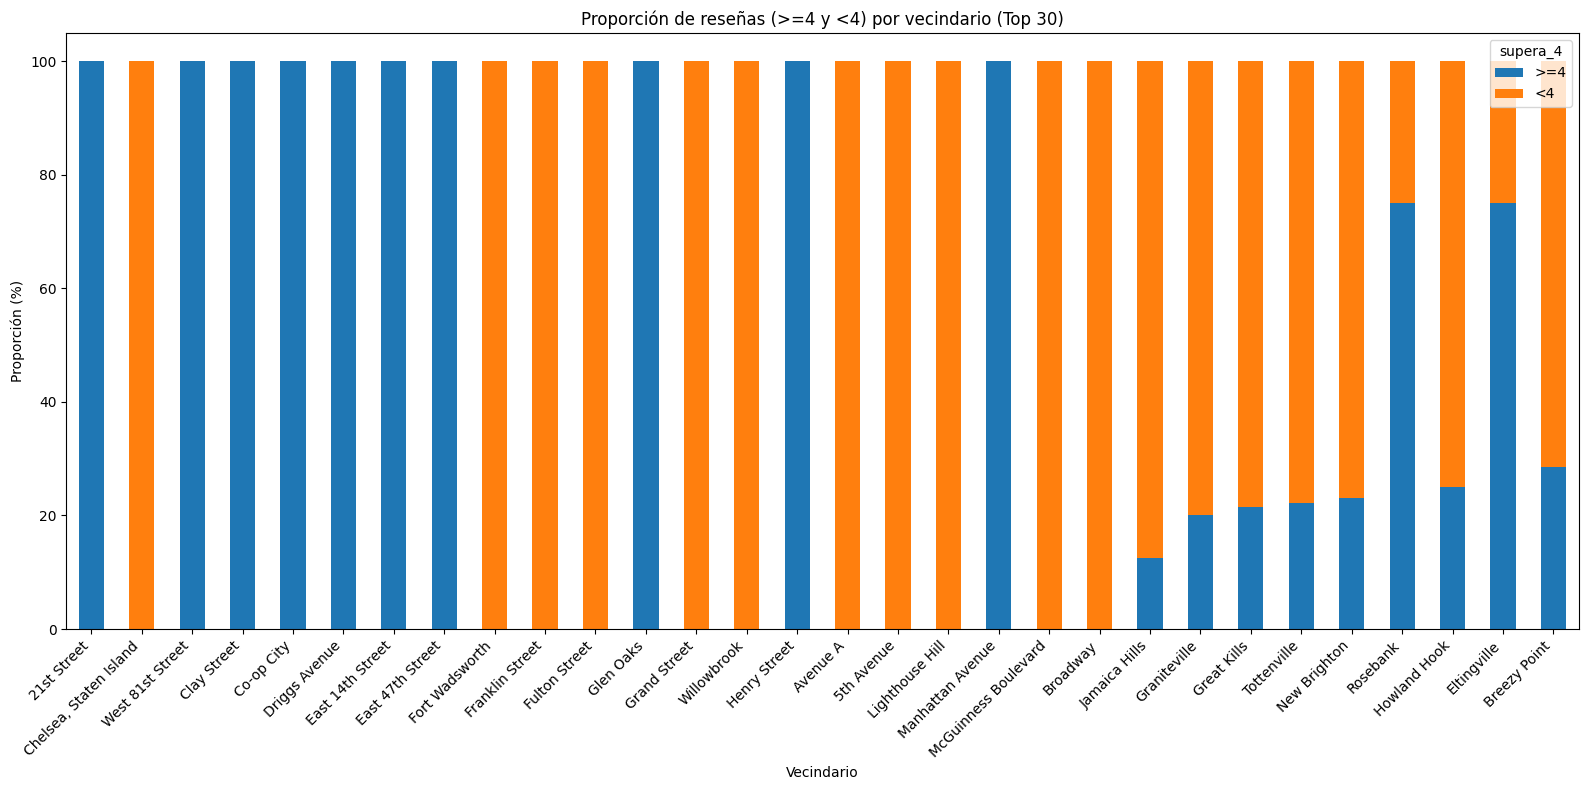

In [11]:
#Filtro los 30 vecindarios que, proporcionalmente, tengan mayor diferencia en rating.
neighbourhood_counts = df.groupby(['neighbourhood', 'supera_4']).size().unstack(fill_value=0)
neighbourhood_proportions = neighbourhood_counts.div(neighbourhood_counts.sum(axis=1), axis=0) * 100
neighbourhood_proportions['Difference'] = abs(neighbourhood_proportions['>=4'] - neighbourhood_proportions['<4'])
top_30_neighbourhoods = neighbourhood_proportions.sort_values(by='Difference', ascending=False).head(30)

top_30_neighbourhoods[['>=4', '<4']].plot(kind='bar', stacked=True, figsize=(16, 8))
plt.title('Proporción de reseñas (>=4 y <4) por vecindario (Top 30)')
plt.xlabel('Vecindario')
plt.ylabel('Proporción (%)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

El último gráfico de barras permite los barrios que tienen mayor tendencia en alcanzar o no el rating de 4. Por ejemplo, es sumamente probable que si el alojamiento se encuentra en 21st Street, este alcance las 4 estrellas. Se podría intuir que hay una relación entre el barrio del alojamiento y su rating, respondiendo a la primera hipótesis.

<ipython-input-12-cabad6442d31>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='supera_4', y='minimum_nights', data=df, palette="Set1", ax=axes[0])
<ipython-input-12-cabad6442d31>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='supera_4', y='minimum_nights', data=df, palette="Set1", ax=axes[1])


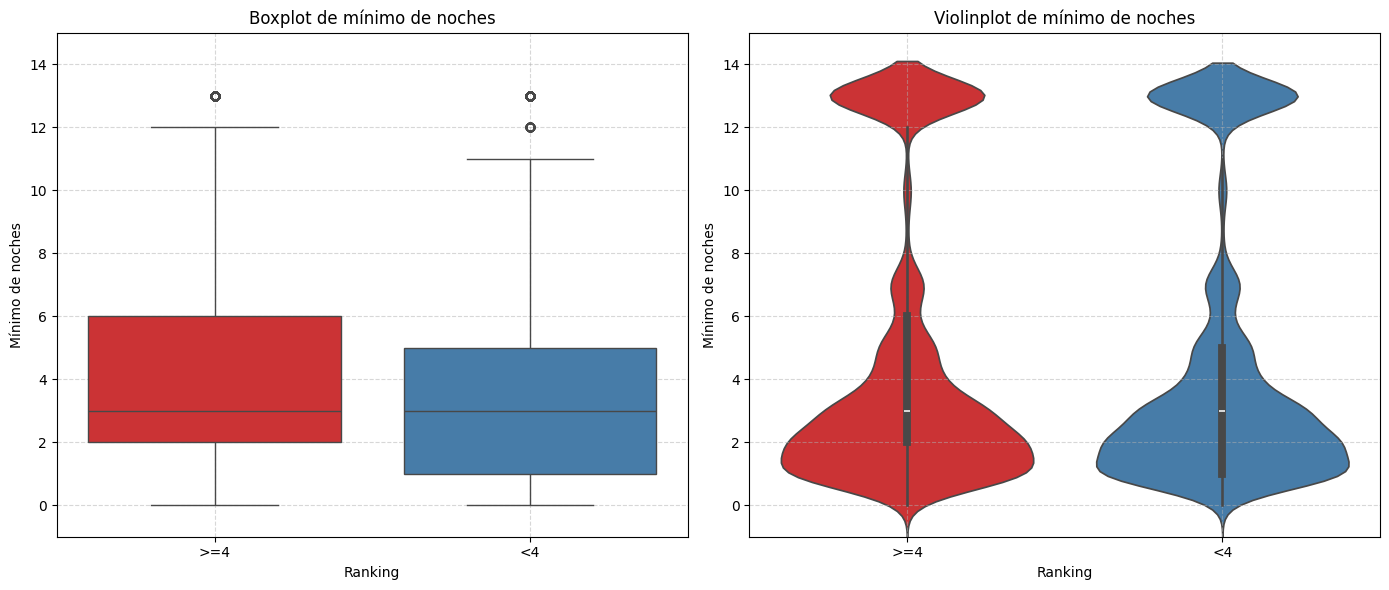

In [12]:
#Genero subplot compuesto de boxplot y violinplot para analizar distribución de la política de mínimo de noches y su relación con el rating.
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

#Boxplot
sns.boxplot(x='supera_4', y='minimum_nights', data=df, palette="Set1", ax=axes[0])
axes[0].set_title('Boxplot de mínimo de noches')
axes[0].set_xlabel('Ranking')
axes[0].set_ylabel('Mínimo de noches')
axes[0].set_ylim(-1, 15)
axes[0].grid(True, linestyle='--', alpha=0.5)

#Violinplot
sns.violinplot(x='supera_4', y='minimum_nights', data=df, palette="Set1", ax=axes[1])
axes[1].set_title('Violinplot de mínimo de noches')
axes[1].set_xlabel('Ranking')
axes[1].set_ylabel('Mínimo de noches')
axes[1].set_ylim(-1, 15)
axes[1].grid(True, linestyle='--', alpha=0.5)

plt.tight_layout()
plt.show()

Respondiendo a la segunda hipótesis, podemos ver que la política de mínimo de noches tiene un impacto significativo en el rating. El boxplot indica que a menor mínimo de noches, mayor es la probabilidad de que el alojamiento alcance las 4 estrellas.

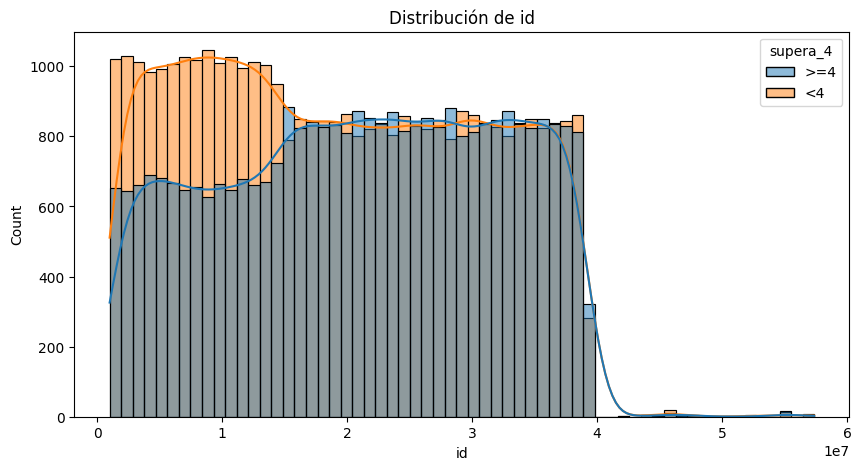

In [ ]:
  #Genero un histograma que separa el valor de las reseñas según el número de ID
  plt.figure(figsize=(10,5))
  sns.histplot(data=df, x='id', hue='supera_4', kde=True)
  plt.title('Distribución de id')
  plt.xlabel('id')
  plt.show()

Este gráfico responde a la tercera hipótesis. Las primeras IDs que tuvieron lugar tenían alta tendencia a no alcanzar el rating de 4 estrellas. Se debería investigar con mayor profundidad cuál es el criterio a la hora de asignar IDs únicas. Este criterio puede tener un sesgo. De ser una asignación por orden temporal de creación, podría concluirse que, a lo largo del tiempo, las reviews han sido más flexibles o se ha mejorado la calidad de servicio de los alojamientos más recientes.

A continuación, se indican los resultados con todas las variables en caso de requerir futuros análisis en el futuro.

In [13]:
object_columns = df.select_dtypes(include=['object']).columns
object_columns = object_columns.drop('supera_4')

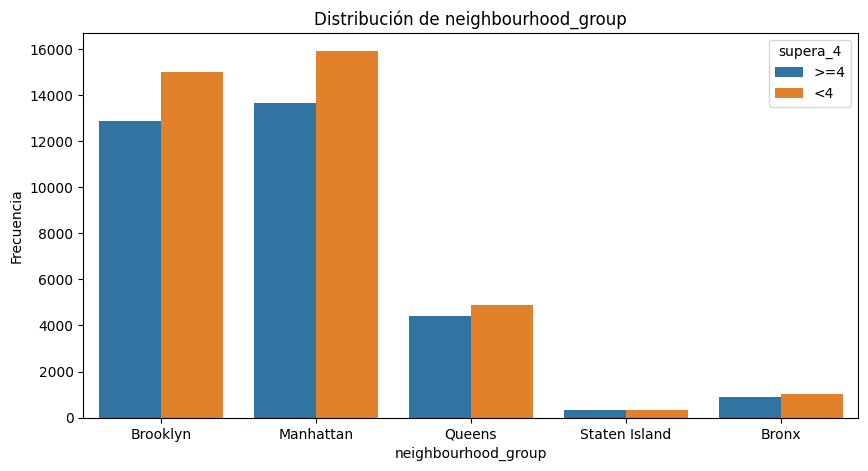

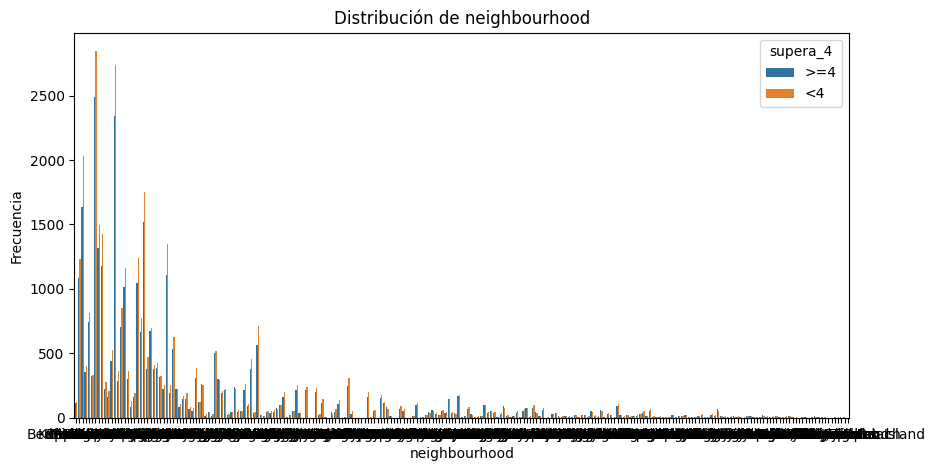

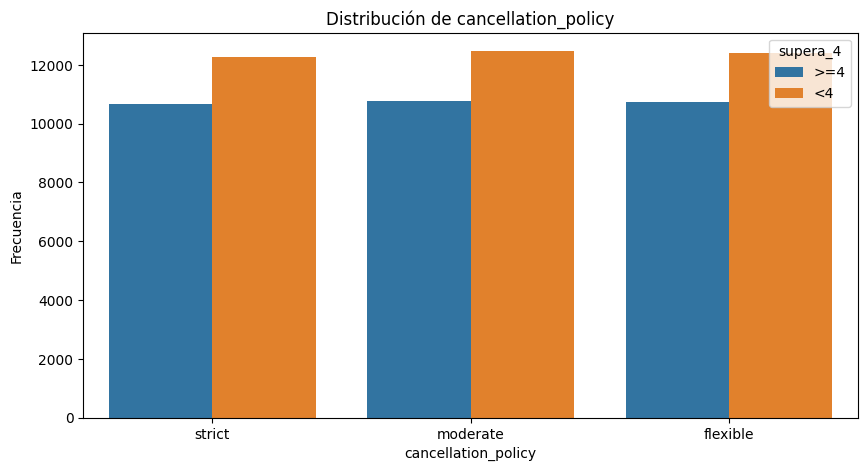

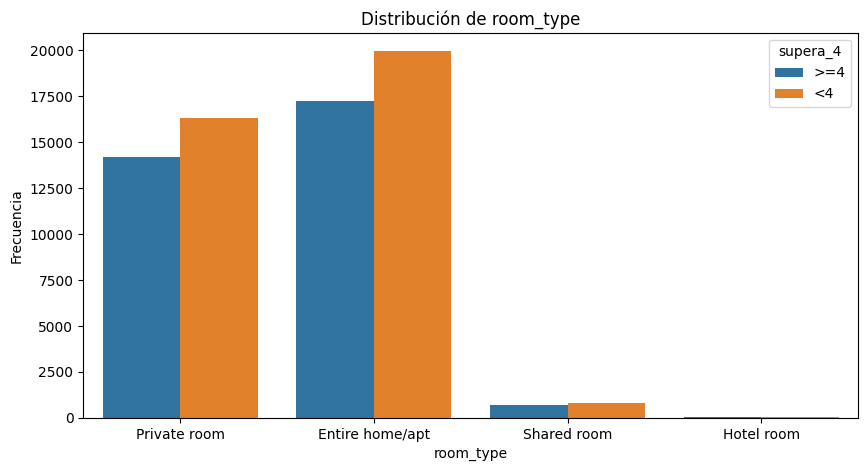

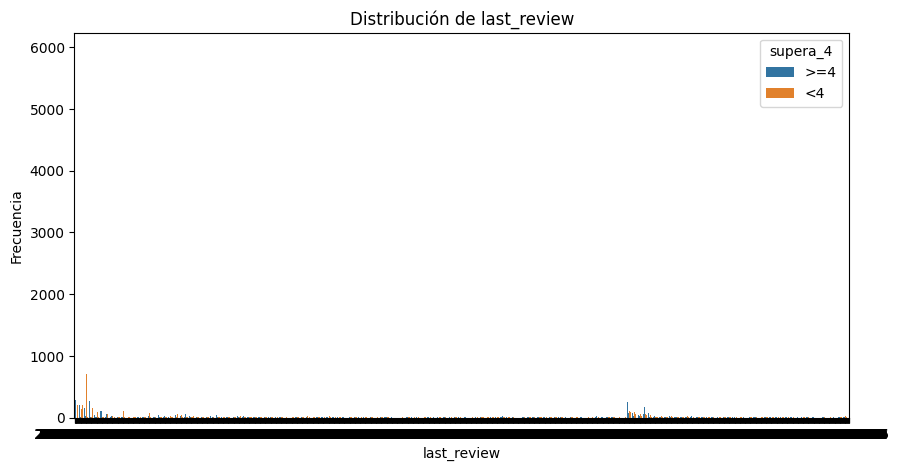

In [14]:
for column in object_columns:
    plt.figure(figsize=(10,5))
    sns.countplot(data=df, x=column,hue='supera_4')
    plt.title(f'Distribución de {column}')
    plt.xlabel(column)
    plt.ylabel('Frecuencia')
    plt.show()

In [16]:
numeric_columns = df.select_dtypes(include=[np.number]).columns

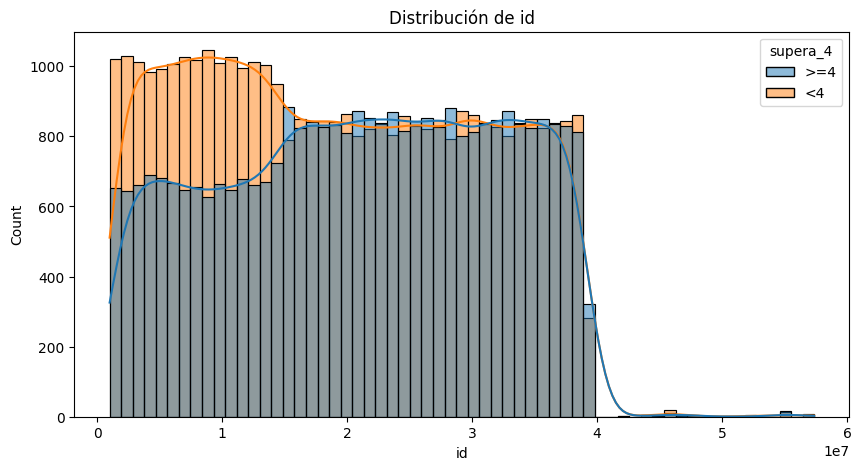

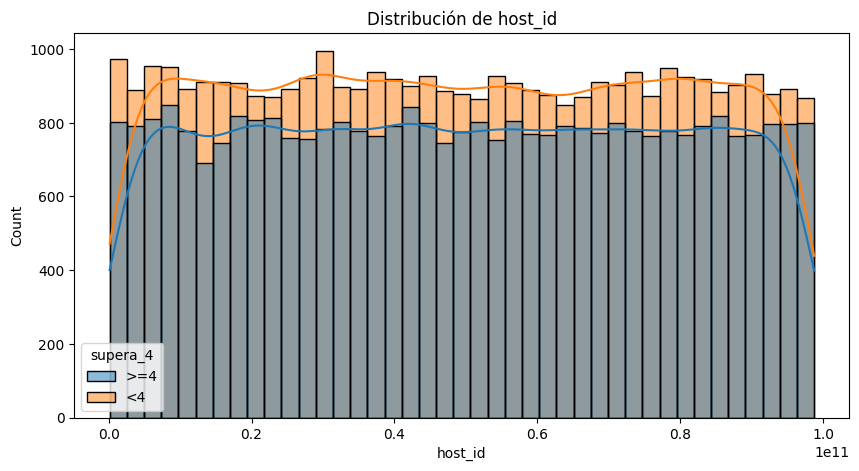

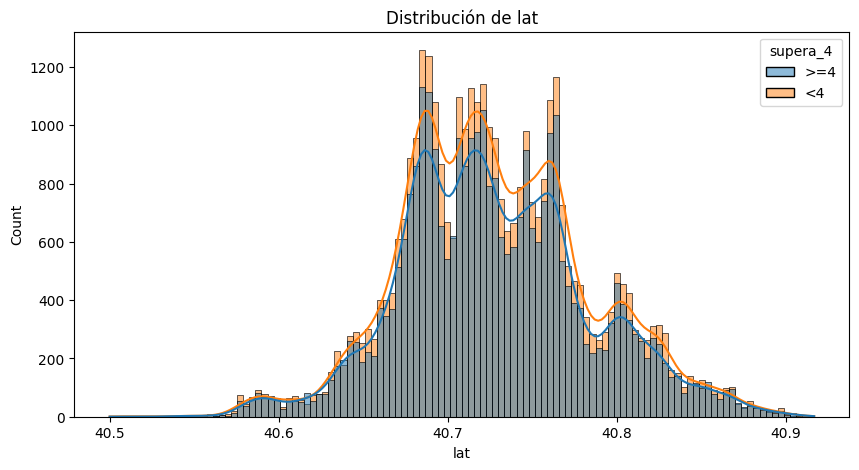

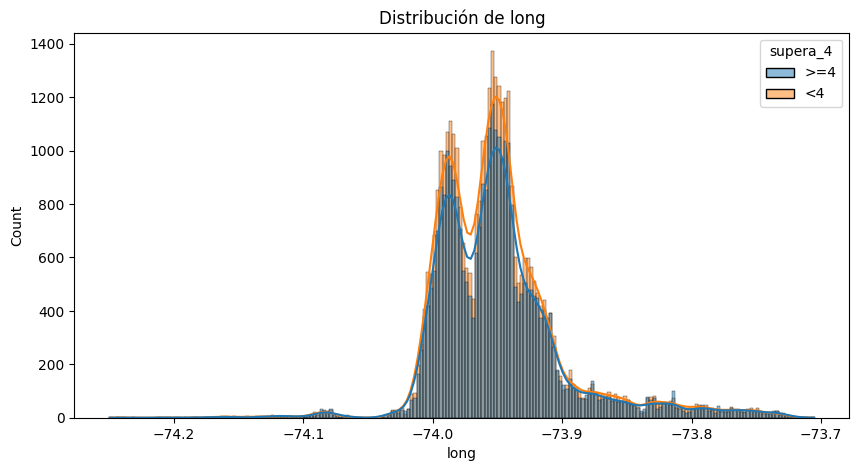

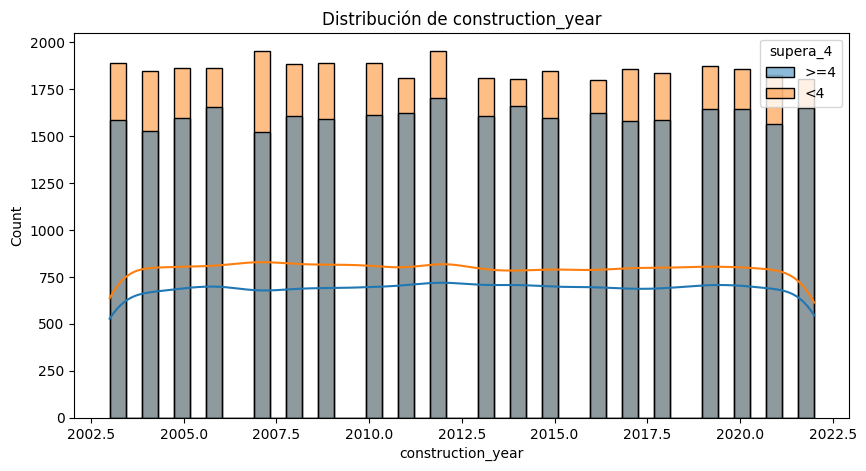

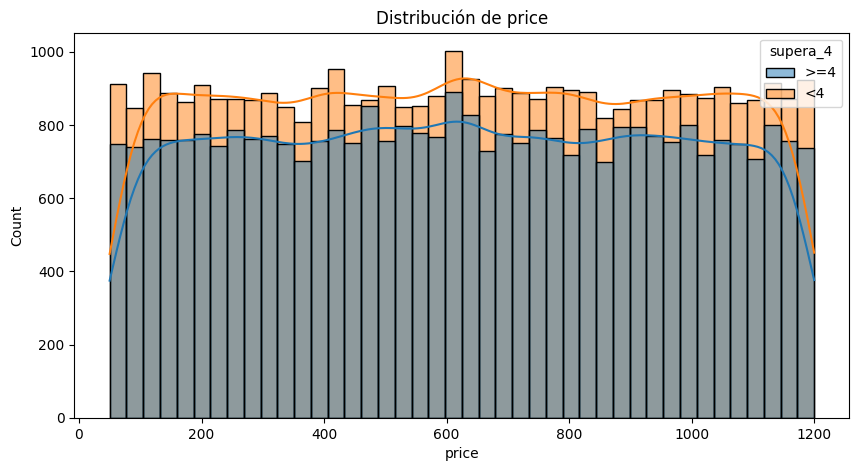

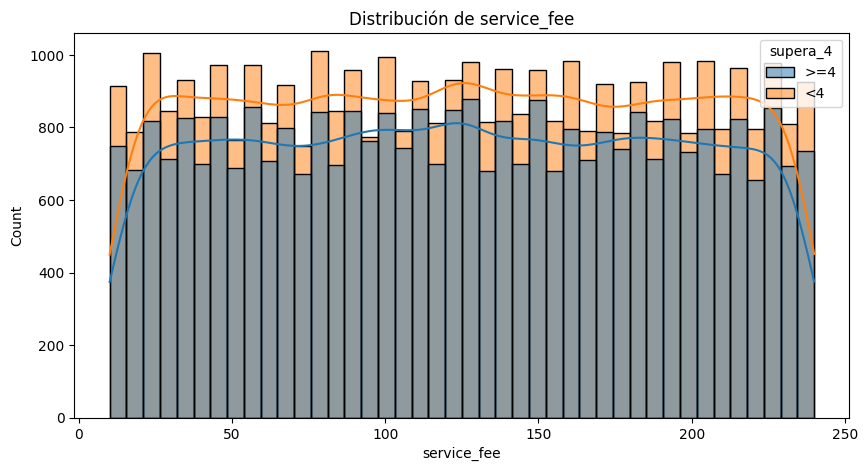

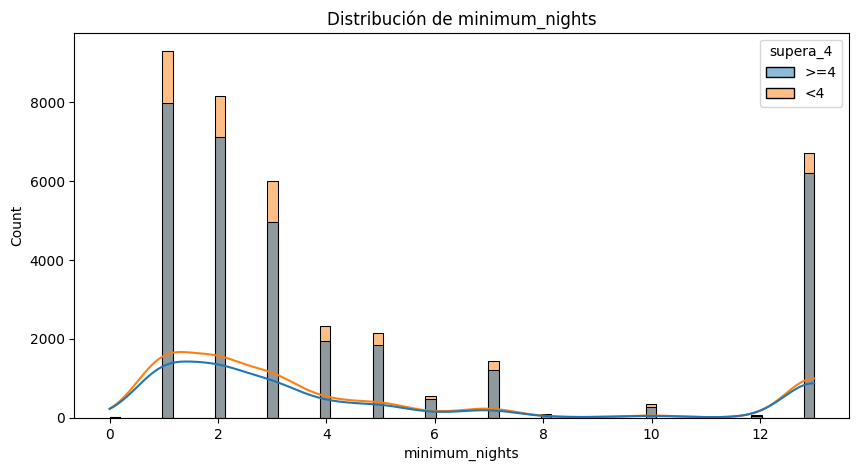

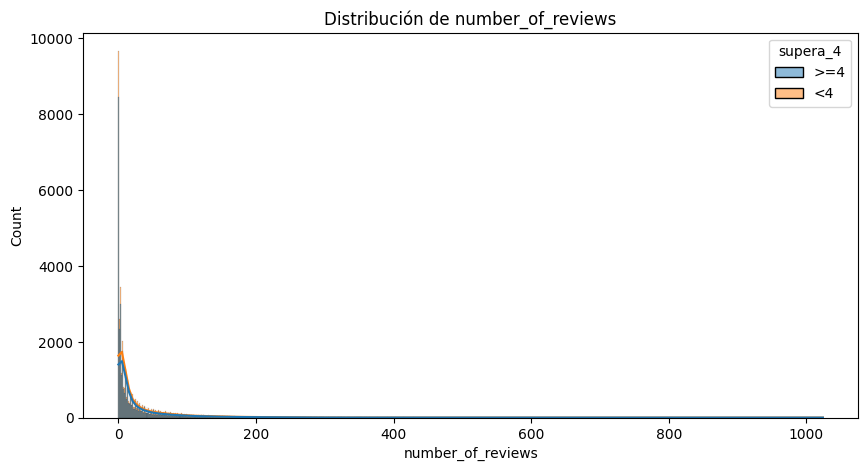

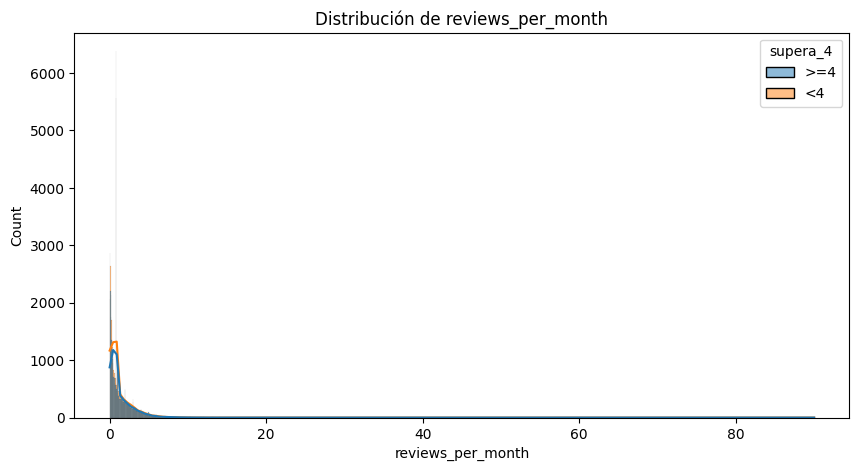

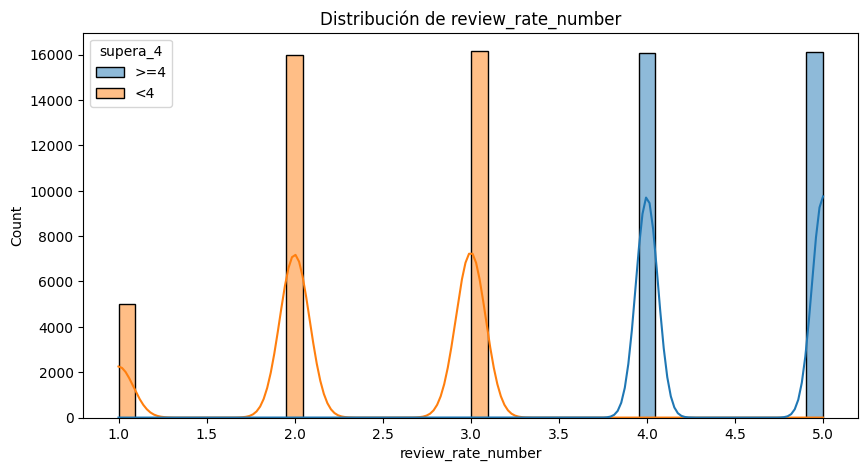

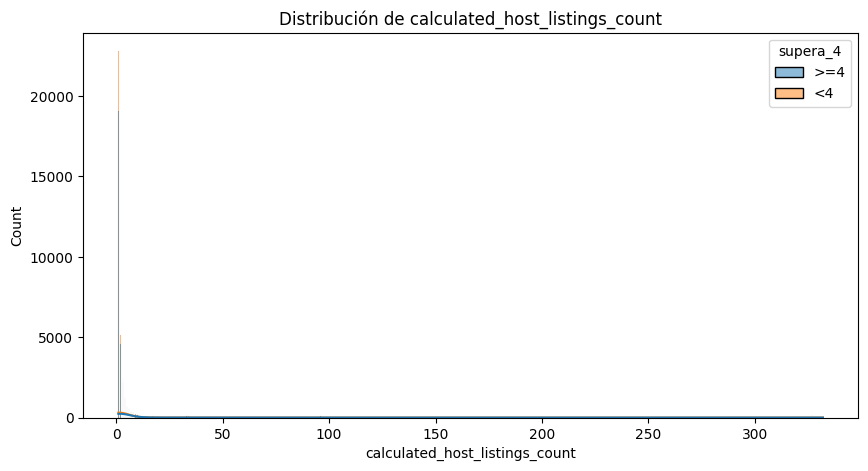

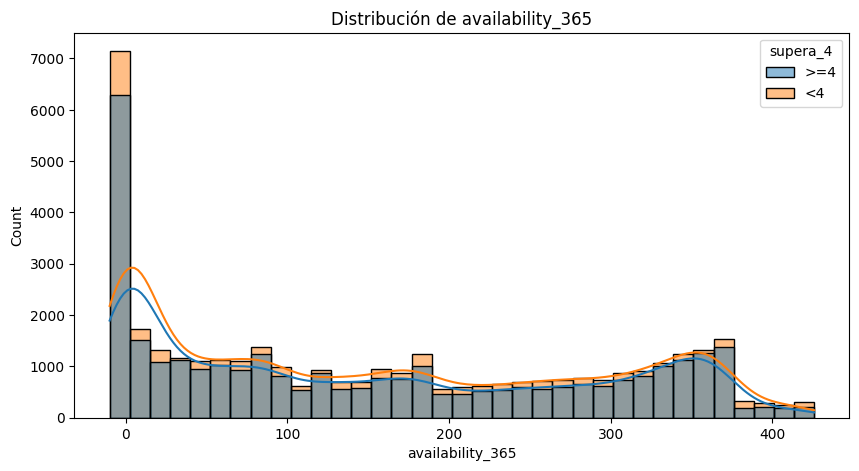

In [17]:
for column in numeric_columns:
    plt.figure(figsize=(10,5))
    sns.histplot(data=df, x=column, hue='supera_4', kde=True)
    plt.title(f'Distribución de {column}')
    plt.xlabel(column)
    plt.show()